In [1]:
from source.encode import encode_numbers
from source.utils import pairwise_cosine_similarity_matrix
import matplotlib.pyplot as plt
import torch

/Users/vladimir/numerical-data-representation/.venv/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


### Syntetic data
Lets list here some examples of syntetic data to show that model captures contextual and numerical information.

In [2]:
different_numbers: list[str | int | float] = ["1", 1, "10", 11, 20, "20", 25, 35, "50"]
different_amounts_of_same_categories: list[str | int | float] = ["1 rabbit", "10 rabbits", "10 rats", "20 rabbits"]
same_amounts_of_different_categories: list[str | int | float] = ["5 dollar", "5 euro", "5 rabbits", "5 dogs"]
different_amounts_of_different_categories: list[str | int | float] = ["1 dollar", "1 euro",  "5 euros", "5 cats", "5 dogs", "10 rabbits"]

### Embedding evaluation for numbers

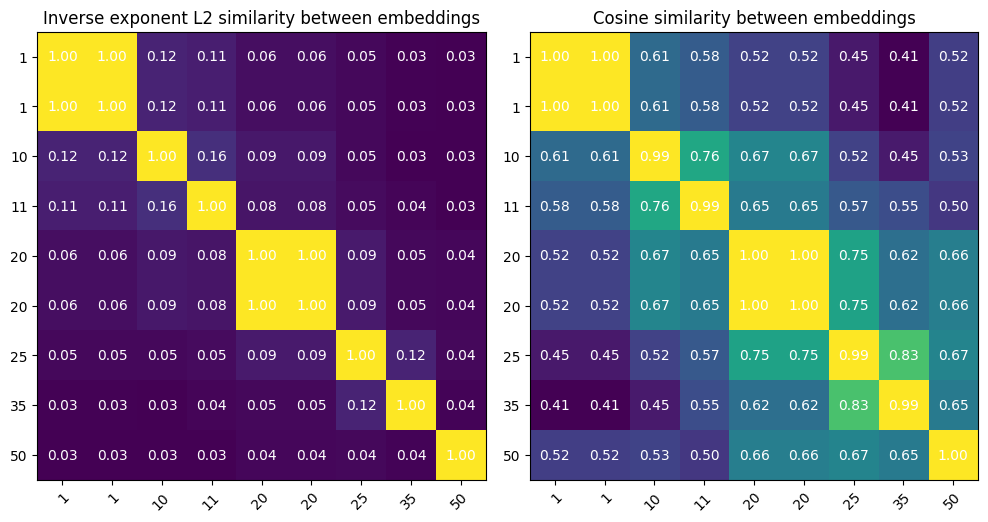

In [8]:
embeddings = encode_numbers(different_numbers, embedding_type='logarithmic')
pairwise_l2_distances = torch.cdist(embeddings.unsqueeze(0), embeddings.unsqueeze(0)).squeeze(0)
pairwise_l2_similarities = torch.exp(-pairwise_l2_distances)
pairwise_cosine_similarities = pairwise_cosine_similarity_matrix(embeddings, embeddings)

figure = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
im = plt.imshow(pairwise_l2_similarities)
plt.xticks(
    torch.arange(len(different_numbers)),
    labels=[str(sentence) for sentence in different_numbers],
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)
plt.yticks(torch.arange(len(different_numbers)), labels=[str(sentence) for sentence in different_numbers])

for i in range(len(different_numbers)):
    for j in range(len(different_numbers)):
        text = plt.text(j, i, f"{pairwise_l2_similarities[i, j].item():.9f}"[:4],
                       ha="center", va="center", color="w")
        
plt.title("Inverse exponent L2 similarity between embeddings")

plt.subplot(1, 2, 2)
im = plt.imshow(pairwise_cosine_similarities)
plt.xticks(
    torch.arange(len(different_numbers)),
    labels=[str(sentence) for sentence in different_numbers],
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)
plt.yticks(torch.arange(len(different_numbers)), labels=[str(sentence) for sentence in different_numbers])

for i in range(len(different_numbers)):
    for j in range(len(different_numbers)):
        text = plt.text(j, i, f"{pairwise_cosine_similarities[i, j].item():.9f}"[:4],
                       ha="center", va="center", color="w")

plt.title("Cosine similarity between embeddings")
plt.tight_layout()
plt.show()

In [21]:
print(
    "Norms of embeddings:\n\t",
    "\n\t".join([str(different_numbers[i])+":"+str(torch.norm(embeddings, p=2, dim=1)[i].item()) for i in range(len(different_numbers))])
)

Norms of embeddings:
	 1:1.5514445304870605
	1:1.5514445304870605
	10:2.61872935295105
	11:2.6890904903411865
	20:3.166246175765991
	20:3.166246175765991
	25:3.3575336933135986
	35:3.656311511993408
	50:3.983753204345703


We can see that embedding captures proximity between different numbers, e.g. 1 is more similar to 10, then to 50 etc. The norms of vectors also correspond to their magnitued, e.g. ||embedding of 1|| < ||embedding of 10||.

### Embedding evaluation for similar categories

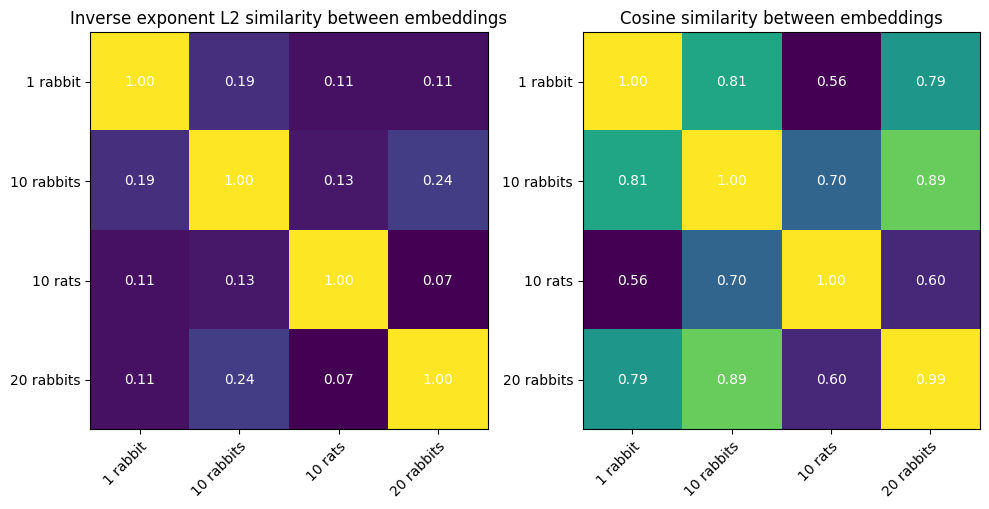

In [23]:
inputs = different_amounts_of_same_categories
embeddings = encode_numbers(inputs, embedding_type='logarithmic')
pairwise_l2_distances = torch.cdist(embeddings.unsqueeze(0), embeddings.unsqueeze(0)).squeeze(0)
pairwise_l2_similarities = torch.exp(-pairwise_l2_distances)
pairwise_cosine_similarities = pairwise_cosine_similarity_matrix(embeddings, embeddings)

figure = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
im = plt.imshow(pairwise_l2_similarities)
plt.xticks(
    torch.arange(len(inputs)),
    labels=[str(sentence) for sentence in inputs],
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)
plt.yticks(torch.arange(len(inputs)), labels=[str(sentence) for sentence in inputs])

for i in range(len(inputs)):
    for j in range(len(inputs)):
        text = plt.text(j, i, f"{pairwise_l2_similarities[i, j].item():.9f}"[:4],
                       ha="center", va="center", color="w")
        
plt.title("Inverse exponent L2 similarity between embeddings")

plt.subplot(1, 2, 2)
im = plt.imshow(pairwise_cosine_similarities)
plt.xticks(
    torch.arange(len(inputs)),
    labels=[str(sentence) for sentence in inputs],
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)
plt.yticks(torch.arange(len(inputs)), labels=[str(sentence) for sentence in inputs])

for i in range(len(inputs)):
    for j in range(len(inputs)):
        text = plt.text(j, i, f"{pairwise_cosine_similarities[i, j].item():.9f}"[:4],
                       ha="center", va="center", color="w")

plt.title("Cosine similarity between embeddings")
plt.tight_layout()
plt.show()

In [25]:
print(
    "Norms of embeddings:\n\t",
    "\n\t".join([str(different_amounts_of_same_categories[i])+":"+str(torch.norm(embeddings, p=2, dim=1)[i].item()) for i in range(len(different_amounts_of_same_categories))])
)

Norms of embeddings:
	 1 rabbit:1.55144464969635
	10 rabbits:2.6187291145324707
	10 rats:2.61872935295105
	20 rabbits:3.166245937347412


The embeddings also capture numerical information from textual context. In the plot above we can see, that 1 rabbit is closer to 10 rabbits then to 20 rabbits. The norms of vectors also correspond to theire respective magnitudes.

### Embedding evaluation for different categories

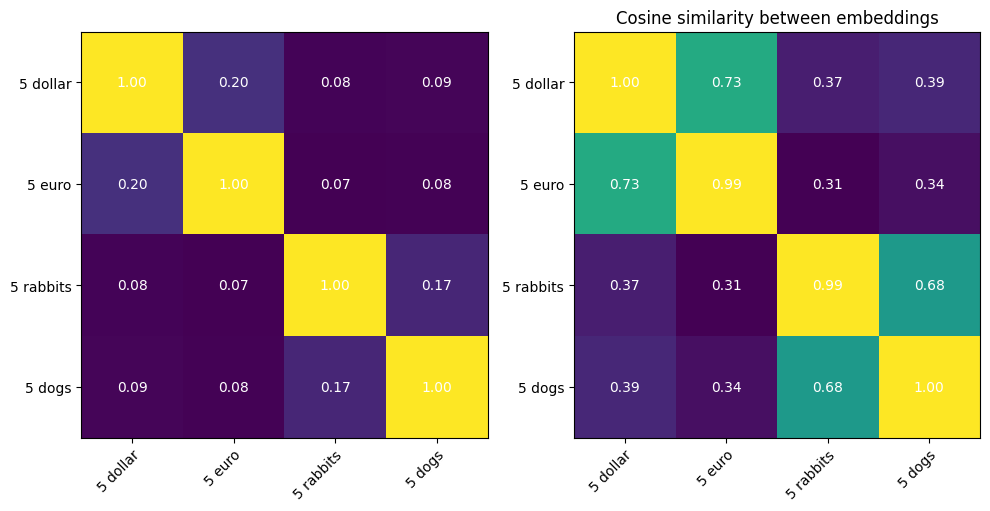

In [26]:
inputs = same_amounts_of_different_categories
embeddings = encode_numbers(inputs, embedding_type='logarithmic')
pairwise_l2_distances = torch.cdist(embeddings.unsqueeze(0), embeddings.unsqueeze(0)).squeeze(0)
pairwise_l2_similarities = torch.exp(-pairwise_l2_distances)
pairwise_cosine_similarities = pairwise_cosine_similarity_matrix(embeddings, embeddings)

figure = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
im = plt.imshow(pairwise_l2_similarities)
plt.xticks(
    torch.arange(len(inputs)),
    labels=[str(sentence) for sentence in inputs],
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)
plt.yticks(torch.arange(len(inputs)), labels=[str(sentence) for sentence in inputs])

for i in range(len(inputs)):
    for j in range(len(inputs)):
        text = plt.text(j, i, f"{pairwise_l2_similarities[i, j].item():.9f}"[:4],
                       ha="center", va="center", color="w")
        
plt.subplot(1, 2, 2)
im = plt.imshow(pairwise_cosine_similarities)
plt.xticks(
    torch.arange(len(inputs)),
    labels=[str(sentence) for sentence in inputs],
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)
plt.yticks(torch.arange(len(inputs)), labels=[str(sentence) for sentence in inputs])

for i in range(len(inputs)):
    for j in range(len(inputs)):
        text = plt.text(j, i, f"{pairwise_cosine_similarities[i, j].item():.9f}"[:4],
                       ha="center", va="center", color="w")

plt.title("Cosine similarity between embeddings")
plt.tight_layout()
plt.show()

Embeddings also capture contextual information. At the plot above we see, that embeddings of money related quantities are closer to each other and form a group. The same applied to animals. E.g. dollars are cloes to euros the rabbits and dogs are cloesr to rabbits then dollars.

### Embedding evaluation for different categories and different amounts

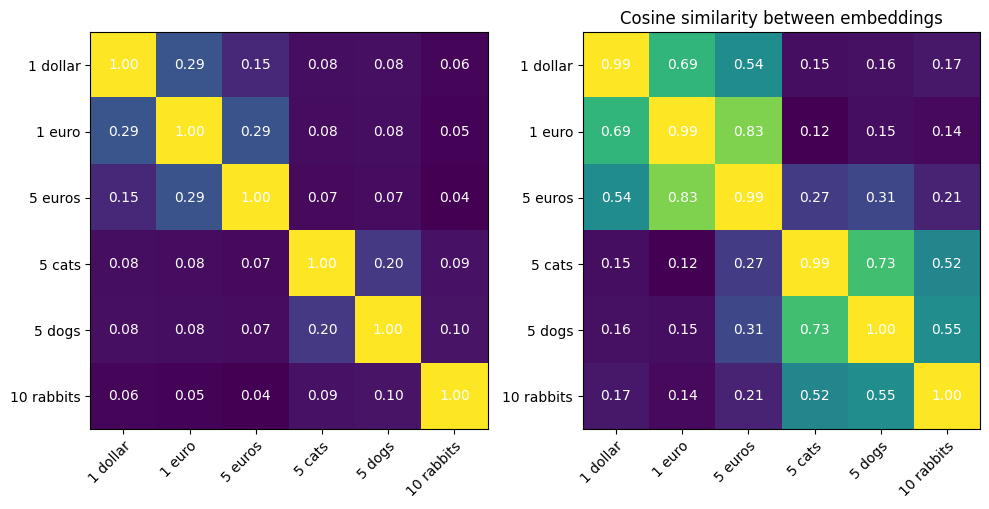

In [27]:
inputs = different_amounts_of_different_categories
embeddings = encode_numbers(inputs, embedding_type='logarithmic')
pairwise_l2_distances = torch.cdist(embeddings.unsqueeze(0), embeddings.unsqueeze(0)).squeeze(0)
pairwise_l2_similarities = torch.exp(-pairwise_l2_distances)
pairwise_cosine_similarities = pairwise_cosine_similarity_matrix(embeddings, embeddings)

figure = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
im = plt.imshow(pairwise_l2_similarities)
plt.xticks(
    torch.arange(len(inputs)),
    labels=[str(sentence) for sentence in inputs],
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)
plt.yticks(torch.arange(len(inputs)), labels=[str(sentence) for sentence in inputs])

for i in range(len(inputs)):
    for j in range(len(inputs)):
        text = plt.text(j, i, f"{pairwise_l2_similarities[i, j].item():.9f}"[:4],
                       ha="center", va="center", color="w")
        
plt.subplot(1, 2, 2)
im = plt.imshow(pairwise_cosine_similarities)
plt.xticks(
    torch.arange(len(inputs)),
    labels=[str(sentence) for sentence in inputs],
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)
plt.yticks(torch.arange(len(inputs)), labels=[str(sentence) for sentence in inputs])

for i in range(len(inputs)):
    for j in range(len(inputs)):
        text = plt.text(j, i, f"{pairwise_cosine_similarities[i, j].item():.9f}"[:4],
                       ha="center", va="center", color="w")

plt.title("Cosine similarity between embeddings")
plt.tight_layout()
plt.show()